# Figure Sizing for LaTeX Documents

The `mpl_tex_settings.py` file includes a key function `set_size()` that calculates optimal figure dimensions based on your LaTeX document's text width. This ensures your figures fit perfectly in your document without requiring scaling, which can distort text and make it inconsistent.

## Key parameters to understand:

1. **Document width (latex_doc_width)**: 
   - Currently set to `441.01775pt` (points)
   - You can find your document's text width by adding `\the\textwidth` in your LaTeX file

2. **Fraction parameter**:
   - Default is `0.5` (half text width)
   - Use `1.0` for full-width figures

3. **Height ratio**:
   - Controls the aspect ratio (height/width)
   - Default uses the golden ratio ≈ 0.618 for aesthetically pleasing proportions

4. **Subplots parameter**:
   - Adjusts height for grid layouts like `(2,2)` for 2×2 subplots

Let's demonstrate these settings with some examples:

LaTeX: not available -> using mathtext


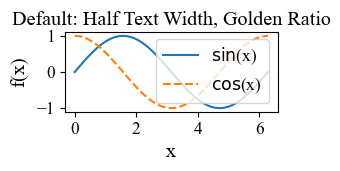

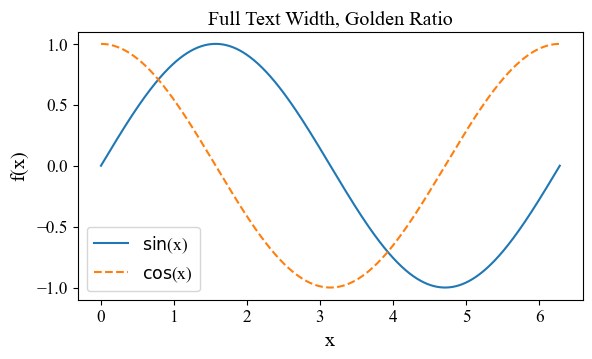

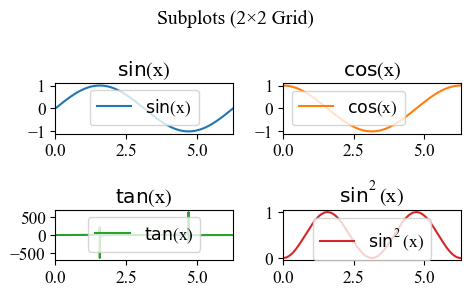

Note how each figure size is optimized for the document width and layout requirements.
Current document width: 441.01775pt
Dimensions of each figure (width × height in inches):
1. Default (half width): (3.051181333886813, 1.885733770181292)
2. Full width: (6.102362667773626, 3.771467540362584)
3. Half width, custom ratio: (3.051181333886813, 2.2883860004151098)
4. 2×2 subplot grid: (4.881890134218902, 3.0171740322900678)


In [1]:
# Plotstyle demonstration replacing legacy mpl_tex_settings
from plotstyle import init_style, set_size, save_fig, COLORS, LINE_STYLES, MARKERS, LATEX_DOC_WIDTH, DPI, FIG_FORMAT, TRANSPARENCY
import numpy as np
import matplotlib.pyplot as plt
init_style(force=True, quiet=False)
print("Initialized plotstyle (replacing old mpl_tex_settings module).")

# Simple demo figure to confirm styling
fig, ax = plt.subplots(figsize=set_size(fraction=0.6))
ax.plot(np.linspace(0,1,200), np.sin(6*np.pi*np.linspace(0,1,200)), color=list(COLORS.keys())[0])
ax.set_xlabel('x')
ax.set_ylabel('sin(6πx)')
ax.set_title('Demo Figure Using plotstyle')
plt.show()

## Scientific Notation with LaTeX Formatting

The `format_sci_notation()` function provides properly formatted scientific notation for plot labels and text. This is especially important in scientific publications where numbers need consistent and precise representation.

Key features:
- Converts numbers to LaTeX-formatted scientific notation (e.g., $1.2 \times 10^3$ instead of 1200)
- Handles very large and very small numbers elegantly
- Simplifies when the coefficient is 1 (e.g., $10^6$ instead of $1 \times 10^6$)
- Options to customize decimal places and LaTeX delimiters

Standard scientific notation examples:
0.0001 → $10^{-4}$
1000 → $10^{3}$
2.5e-6 → $2.5 \cdot 10^{-6}$
1e5 → $10^{5}$
Pi (π) → $3.142 \cdot 10^{0}$

Controlling decimal places:
0.0001 (1 decimal): $10^{-4}$
0.0001 (3 decimals): $10^{-4}$

Without LaTeX dollar delimiters (for use inside math environments):
1e-3 → 10^{-3}


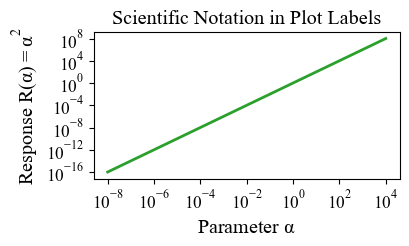

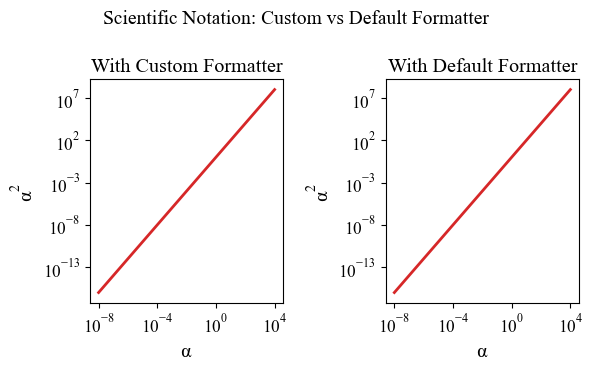

In [2]:
# Additional figure with explicit use of plotstyle constants
from plotstyle import COLORS, LINE_STYLES, set_size, save_fig
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=set_size(fraction=0.45))
for i, ls in enumerate(LINE_STYLES[:4]):
    ax.plot(np.linspace(0,1,400), np.cos((i+1)*2*np.pi*np.linspace(0,1,400)), linestyle=ls, color=list(COLORS.keys())[i], label=f'mode {i+1}')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('cos(k 2πx)')
ax.set_title('Line style + color cycle (plotstyle)')
plt.show()

## Font Selection and Text Rendering

The `mpl_tex_settings.py` module helps maintain consistent typography by:

1. **Font Selection**: Automatically choosing the best serif font available on your system
   - Preferred order: Palatino, CMU Serif, Times New Roman
   - Falls back gracefully if preferred fonts aren't available

2. **LaTeX vs. Mathtext**: Detecting LaTeX availability and configuring accordingly
   - Uses real LaTeX rendering if available for professional typesetting
   - Falls back to matplotlib's built-in mathtext renderer if LaTeX isn't installed

3. **Font Size Matching**: Converting between LaTeX and matplotlib point sizes
   - Uses `calculate_matching_font_size()` to ensure consistent sizing

Let's examine the current font configuration:

Font Settings:
 - Active family setting: ['serif']
 - Preferred serif cascade: ['cmu serif', 'times new roman', 'serif']
 - Example resolved first-serif target: cmu serif
 - LaTeX available: False
 - FONT_SIZE (mpl logical points): 12.50


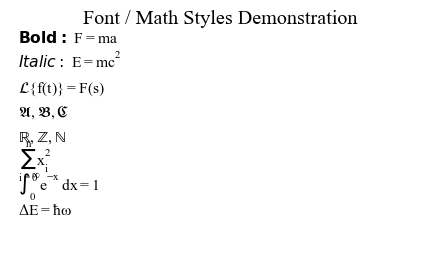

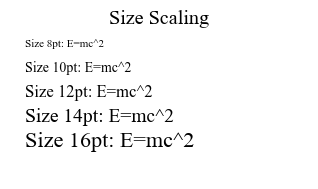

In [3]:
import matplotlib as mpl
import matplotlib.font_manager as fm

serif_prefs    = mpl.rcParams.get('font.serif', [])
active_family  = mpl.rcParams.get('font.family')
resolved_font  = serif_prefs[0] if serif_prefs else 'serif'

print("Font Settings:")
print(f" - Active family setting: {active_family}")
print(f" - Preferred serif cascade: {serif_prefs}")
print(f" - Example resolved first-serif target: {resolved_font}")
print(f" - LaTeX available: {latex_available}")
print(f" - FONT_SIZE (mpl logical points): {FONT_SIZE:.2f}")

fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.75))
samples = [
    r"$\mathbf{Bold:}\; F=ma$",
    r"$\mathit{Italic:}\; E=mc^2$",
    r"$\mathcal{L}\{f(t)\}=F(s)$",
    r"$\mathfrak{A},\mathfrak{B},\mathfrak{C}$",
    r"$\mathbb{R},\mathbb{Z},\mathbb{N}$",
    r"$\sum_{i=0}^{n} x_i^2$",
    r"$\int_0^{\infty} e^{-x}\,dx=1$",
    r"$\Delta E = \hbar\omega$",
]
for i, txt in enumerate(samples):
    ax.text(0.02, 0.95 - i*0.11, txt, transform=ax.transAxes, fontsize=FONT_SIZE*0.9)
ax.set_axis_off()
ax.set_title(maybe_latex(r"Font / Math Styles Demonstration"))
plt.show()

# Font size scaling line
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.55))
for j, sz in enumerate([8, 10, 12, 14, 16]):
    ax.text(0.05, 0.9 - j*0.17, maybe_latex(fr"Size {sz}pt: $E=mc^2$"), fontsize=sz)
ax.set_axis_off()
ax.set_title(maybe_latex(r"Size Scaling"))
plt.show()

## Saving Figures Consistently

The `save_fig()` function provides a consistent way to save figures across your project:

- Supports multiple file formats in one call (png, pdf, svg, etc.)
- Automatically creates directories if they don't exist
- Uses consistent DPI and transparency settings
- Applies tight bounding box for optimal layout

This helps maintain a consistent look and feel for all figures in your thesis.

# Using LaTeX-compatible plotting in notebooks

This notebook demonstrates how to use the `mpl_tex_settings` module in Jupyter notebooks for professional, LaTeX-compatible scientific plotting.

The `mpl_tex_settings.py` module provides consistent matplotlib settings for the Master's thesis project and handles:
- LaTeX-compatible text rendering (when LaTeX is available)
- Consistent figure sizing based on your LaTeX document width
- Scientific notation formatting
- Font selection and sizing
- Automatic backend detection for different environments
- Figure saving in multiple formats

You can import the module at the beginning of any script to apply these settings automatically.

In [4]:
import sys, os, numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Ensure parent directory (one level up) is on path for package import
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from qspectro2d.config.mpl_tex_settings import *  # noqa: F401,F403

print("Matplotlib settings loaded")
print(f" - LaTeX rendering: {'Enabled' if latex_available else 'Disabled (mathtext)'}")
print(f" - Backend: {mpl.get_backend()}")
print(f" - Default figure size rcParams: {mpl.rcParams['figure.figsize']}")
print(f" - LATEX_DOC_WIDTH: {LATEX_DOC_WIDTH} pt")
print(f" - FONT_SIZE (mapped from LaTeX {LATEX_FONT_SIZE}pt): {FONT_SIZE:.2f} pt (mpl)")
print(f" - Default format: {FIG_FORMAT}, DPI: {DPI}")
print(f" - Available LINE_STYLES count: {len(LINE_STYLES)}, MARKERS count: {len(MARKERS)}")
print(f" - Transparency default: {TRANSPARENCY}")

Matplotlib settings loaded
 - LaTeX rendering: Disabled (mathtext)
 - Backend: module://matplotlib_inline.backend_inline
 - Default figure size rcParams: [8.0, 6.0]
 - LATEX_DOC_WIDTH: 441.01775 pt
 - FONT_SIZE (mapped from LaTeX 11pt): 12.50 pt (mpl)
 - Default format: svg, DPI: 100
 - Available LINE_STYLES count: 6, MARKERS count: 10
 - Transparency default: True


## Example Plot with Scientific Formatting

Let's create a plot with proper scientific formatting using our LaTeX settings.

In [5]:
from scipy.special import factorial
# Function to generate data
def quantum_oscillator(t, omega, n):
    """Generate quantum harmonic oscillator wavefunction probability density."""
    # Hermite polynomial (physicist's version)
    def hermite(x, n):
        if n == 0:
            return np.ones_like(x)
        elif n == 1:
            return 2 * x
        else:
            return 2 * x * hermite(x, n-1) - 2 * (n-1) * hermite(x, n-2)
    
    # Constants
    hbar = 1.0  # Normalized units
    m = 1.0     # Normalized mass
    
    # Position space
    x = np.linspace(-5, 5, 1000)
    
    # Angular frequency and time evolution
    phase = omega * t
    
    # Normalization constant
    norm = 1.0 / (np.sqrt(2**n * factorial(n) * np.sqrt(np.pi)))
    
    # Wavefunction (time-independent part)
    psi = norm * hermite(x, n) * np.exp(-x**2 / 2) * np.exp(-1j * (n + 0.5) * phase)
    
    # Probability density
    prob_density = np.abs(psi)**2
    
    return x, prob_density

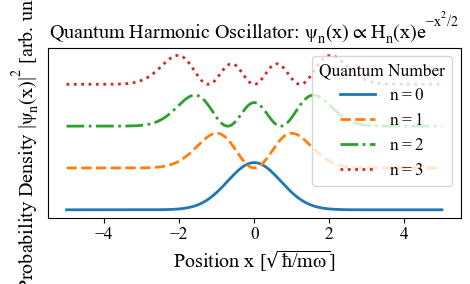

In [6]:
# Create a figure with optimal size for LaTeX
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.8))

# Generate data for different quantum states
t = 0  # Initial time
omega = 1.0  # Angular frequency
max_n = 4  # Maximum quantum number

# Plot different quantum states with appropriate formatting
for n in range(max_n):
    x, prob = quantum_oscillator(t, omega, n)
    
    # Plot with proper styling
    ax.plot(x, prob + n*0.5,  # Offset for visibility
            color=f'C{n}',
            linestyle=LINE_STYLES[n % len(LINE_STYLES)],
            linewidth=2,
            label=f'$n={n}$')
    
# Add proper labels with LaTeX formatting
ax.set_xlabel(r'Position $x$ [$\sqrt{\hbar/m\omega}$]')
ax.set_ylabel(r'Probability Density $|\psi_n(x)|^2$ [arb. units]')

# Set title with LaTeX equation
ax.set_title(r'Quantum Harmonic Oscillator: $\psi_n(x) \propto H_n(x)e^{-x^2/2}$')

# Add legend
ax.legend(title=r'Quantum Number', frameon=True, loc='upper right')

# Remove y-ticks as they are arbitrary
ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()

## Saving Figures

Use the `save_fig` function to save figures consistently:

Figure saved as: C:\Users\leopo\Documents\Projects\2025_master_thesis_leopold_bodamer\figures\figures_from_python\tests\demo_figure_default.svg


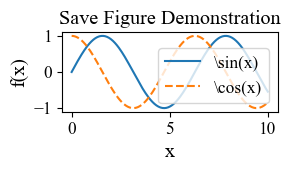

Figure saved as: C:\Users\leopo\Documents\Projects\2025_master_thesis_leopold_bodamer\figures\figures_from_python\tests\demo_figure_multiformat.png, svg, pdf


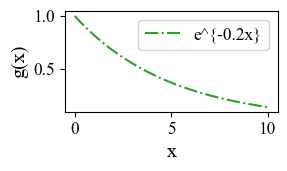

Figure saved as: C:\Users\leopo\Documents\Projects\2025_master_thesis_leopold_bodamer\figures\figures_from_python\tests\demo_figure_highres.png


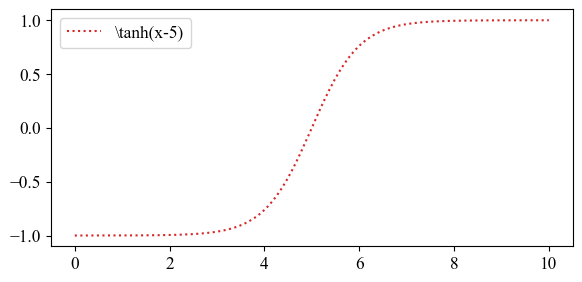

Figure saved as: C:\Users\leopo\Documents\Projects\2025_master_thesis_leopold_bodamer\figures\figures_from_python\tests\notebook_examples\demo_figure_custom_dir.png


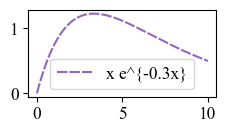

In [7]:
from pathlib import Path  # relies on earlier import of qspectro2d.config.mpl_tex_settings
from qspectro2d.config.mpl_tex_settings import save_fig, set_size, maybe_latex, FIGURES_TESTS_DIR, LATEX_DOC_WIDTH
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.5))
x        = np.linspace(0, 10, 200)
ax.plot(x, np.sin(x), color='C0', linestyle='solid', label=maybe_latex(r'$\sin(x)$'))
ax.plot(x, np.cos(x), color='C1', linestyle='dashed', label=maybe_latex(r'$\cos(x)$'))
ax.set_xlabel(maybe_latex(r'$x$'))
ax.set_ylabel(maybe_latex(r'$f(x)$'))
ax.set_title(maybe_latex(r'Save Figure Demonstration'))
ax.legend()

base_dir    = FIGURES_TESTS_DIR  # from settings
save_fig(fig, str(base_dir / 'demo_figure_default'))  # default format

# Multiple formats
fig2, ax2 = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.5))
ax2.plot(x, np.exp(-0.2*x), color='C2', linestyle='dashdot', label=maybe_latex(r'$e^{-0.2x}$'))
ax2.set_xlabel(maybe_latex(r'$x$'))
ax2.set_ylabel(maybe_latex(r'$g(x)$'))
ax2.legend()
save_fig(fig2, str(base_dir / 'demo_figure_multiformat'), formats=['png','svg','pdf'])

# High DPI + size override
fig3, ax3 = plt.subplots()
ax3.plot(x, np.tanh(x-5), color='C3', linestyle='dotted', label=maybe_latex(r'$\tanh(x-5)$'))
ax3.legend()
save_fig(fig3, str(base_dir / 'demo_figure_highres'), formats=['png'], dpi=300, figsize=(6,3))

# Custom subdirectory
custom_dir = base_dir / 'notebook_examples'
custom_dir.mkdir(parents=True, exist_ok=True)
fig4, ax4 = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.4))
ax4.plot(x, x*np.exp(-0.3*x), color='C4', linestyle=(0,(5,1)), label=maybe_latex(r'$x e^{-0.3x}$'))
ax4.legend()
save_fig(fig4, str(custom_dir / 'demo_figure_custom_dir'), formats=['png'])

## Using Scientific Notation

The `format_sci_notation` function helps with properly formatted scientific notation:

Scientific notation samples:
  1.000e-04 -> $10^{-4}$
  1.000e+03 -> $10^{3}$
  2.500e-06 -> $2.5 \cdot 10^{-6}$
  1.000e+05 -> $10^{5}$


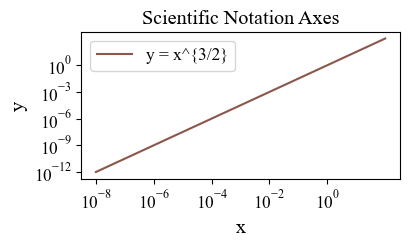

In [8]:
vals = [0.0001, 1000, 2.5e-6, 1e5]
print("Scientific notation samples:")
for v in vals:
    print(f" {v: .3e} -> {format_sci_notation(v)}")

fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.7))
x = np.logspace(-8, 2, 800)
y = x**1.5
ax.loglog(x, y, color='C5', linestyle='solid', label=maybe_latex(r'$y = x^{3/2}$'))
ax.set_xlabel(maybe_latex(r'$x$'))
ax.set_ylabel(maybe_latex(r'$y$'))
sel_xt = [1e-8,1e-6,1e-4,1e-2,1e0]
ax.set_xticks(sel_xt)
ax.set_xticklabels([format_sci_notation(v) for v in sel_xt])
sel_yt = [1e-12,1e-9,1e-6,1e-3,1]
ax.set_yticks(sel_yt)
ax.set_yticklabels([format_sci_notation(v) for v in sel_yt])
ax.set_title(maybe_latex(r'Scientific Notation Axes'))
ax.legend()
plt.show()

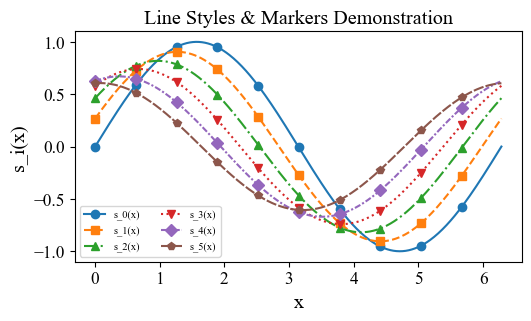

In [9]:
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.9))
x = np.linspace(0, 2*np.pi, 400)
for i, (ls, mk) in enumerate(zip(LINE_STYLES, MARKERS)):
    y = np.sin(x + i*0.3) * np.exp(-0.1*i)
    ax.plot(x, y, color=f'C{i%10}', linestyle=ls, marker=mk, markevery=40,
            label=maybe_latex(fr'$s_{i}(x)$'))
ax.set_xlabel(maybe_latex(r'$x$'))
ax.set_ylabel(maybe_latex(r'$s_i(x)$'))
ax.set_title(maybe_latex(r'Line Styles & Markers Demonstration'))
ax.legend(ncol=2, fontsize=FONT_SIZE*0.6)
plt.show()

Figure saved as: C:\Users\leopo\Documents\Projects\2025_master_thesis_leopold_bodamer\figures\figures_from_python\tests\non_interactive_sin_x.png


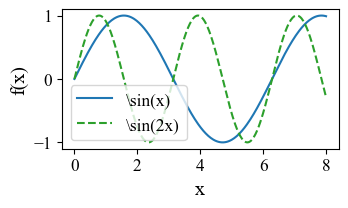

In [10]:
# =============================
# Force non-interactive backend and save a simple plot
# =============================
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.6))
x = np.linspace(0, 8, 300)
ax.plot(x, np.sin(x), color='C0', linestyle='solid', label=maybe_latex(r'$\sin(x)$'))
ax.plot(x, np.sin(2*x), color='C2', linestyle='dashed', label=maybe_latex(r'$\sin(2x)$'))
ax.set_xlabel(maybe_latex(r'$x$'))
ax.set_ylabel(maybe_latex(r'$f(x)$'))
ax.legend()
save_fig(fig, str(FIGURES_TESTS_DIR / 'non_interactive_sin_x'), formats=['png'])

Figure saved as: C:\Users\leopo\Documents\Projects\2025_master_thesis_leopold_bodamer\figures\figures_from_python\tests\test_plot_agg.png


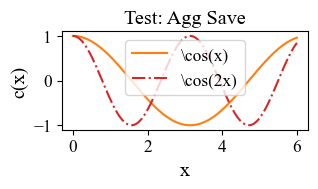

In [11]:
x = np.linspace(0, 6, 250)
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.55))
ax.plot(x, np.cos(x), color='C1', linestyle='solid', label=maybe_latex(r'$\cos(x)$'))
ax.plot(x, np.cos(2*x), color='C3', linestyle='dashdot', label=maybe_latex(r'$\cos(2x)$'))
ax.set_xlabel(maybe_latex(r'$x$'))
ax.set_ylabel(maybe_latex(r'$c(x)$'))
ax.set_title(maybe_latex(r'Test: Agg Save'))
ax.legend()
save_fig(fig, str(FIGURES_TESTS_DIR / 'test_plot_agg'), formats=['png'])

Original: $\Delta E = \hbar\omega$  |  Stripped: Δ E = ℏ ω
Original: $\mathrm{H}_2\mathrm{O}$  |  Stripped: H_2O
Original: $\propto A_{\mu}$  |  Stripped: ∝ A_{μ }


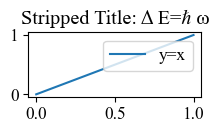

In [12]:
# strip_latex & maybe_latex explicit demo
examples = [r"$\Delta E = \hbar\omega$", r"$\mathrm{H}_2\mathrm{O}$", r"$\propto A_{\mu}$"]
for t in examples:
    print(f"Original: {t}  |  Stripped: {strip_latex(t)}")

fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.4))
ax.set_title(maybe_latex(r'Stripped Title: $\Delta E=\hbar\omega$'))
ax.plot([0,1],[0,1], color='C0', linestyle='solid', label=maybe_latex(r'$y=x$'))
ax.legend()
plt.show()